In [1]:
import math
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from mpmath import nsum, exp, inf

We aim to solve the following PIDE:
<br> <br>
\begin{equation}
\frac{\partial w(x,\tau)}{\partial \tau} - (r-q)\frac{\partial}{\partial x}w(x,\tau) + rw(x,\tau) - \int_{-\infty}^{\infty} \left[w(x+y,\tau) - w(x,\tau) - \frac{\partial w(x,\tau)}{\partial x} (e^y-1)\right] k(y)dy = 0
\end{equation}

Where <br>  <br>
### $k(y) = \frac{e^{-\lambda_p y}}{\nu y^{1+Y}}\mathbb{1}_{{y>0}} + \frac{e^{-\lambda_n|y|}}{\nu|y|^{1+Y}}\mathbb{1}_{{y<0}}$ 
<br> <br>
with <br> 
### $\lambda_p=(\frac{\theta^2}{\sigma^4}+\frac{2}{\nu\sigma^2})^\frac{1}{2}-\frac{\theta}{\sigma^2} $
### $\lambda_n=(\frac{\theta^2}{\sigma^4}+\frac{2}{\nu\sigma^2})^\frac{1}{2}+\frac{\theta}{\sigma^2} $ <br>
<br> Let $x=\ln(S)$ and $\tau=T-t$. <br>
<br> For an up-and-out call (UOC) option premium, this PIDE must be solved subject to the initial condition <br> <br>
$w(x, 0) = (e^x - K)^+$ <br> <br>
and boundary conditions: <br> <br>  $w(x_0, \tau)=0$ for all $\tau$, <br> $w(x_N, \tau)=w(B, \tau)=0$ for all $\tau$.

In order to solve the PIDE, we first look at a way of evaluating the following integral:

$\int_{-\infty}^{+\infty} \left(w(x+y,\tau) - w(x,\tau) - \frac{∂w(x,\tau)}{∂x} (e^y-1) \right) k(y) dy$

Not only do know that the Lévy process k(y) is singular at y = 0,
but we shall also divide the above integral in 2 regions: <br>
(a) |y| <= ε <br>
(b) |y| > ε

Where a natural candidate for epsilon is ε = Δx
<br>

#### (a) First, using Taylor Expansion for w(t+y,𝜏) and $𝑒^𝑦$, we can approximate:

### $\int_{|y| <= \ \epsilon} \left(w(x+y,\tau) - w(x,\tau) - \frac{∂w(x,\tau)}{∂x} (e^y-1) \right) k(y) dy$

by

### $ \frac{\sigma ^2(\epsilon)}{2} \frac{∂^2w(x,\tau)}{∂x^2} - \frac{\sigma ^2(\epsilon)}{2}\frac{∂w(x,\tau)}{∂x}$

Where <br>
$\sigma ^2(\epsilon) = \int_{|y| <= \epsilon} y^2k(y) dy $

(b) Now in order to compute:

### $\int_{|y| > \epsilon}\left(w(x+y,\tau) - w(x,\tau) - \frac{∂w(x,\tau)}{∂x} (e^y-1) \right) k(y) dy$

Rearranging this integral gives us that the above is equal to:


### $\int_{|y| > \epsilon}\left(w(x+y,\tau) - w(x,\tau)\right) k(y) dy + \frac{∂w(x,\tau)}{∂x} \omega(\epsilon)$

<br>
Where <br>

$\omega(\epsilon) = \int_{|y| > \epsilon} y^2k(y) dy $ <br> <br>

<br> Note that, at this point, we have:

\begin{equation}
\frac{∂w(x,\tau)}{∂\tau} - \frac{\sigma ^2(\epsilon)}{2} \frac{∂^2w(x,\tau)}{∂x^2} - \left(r-q + \omega(\epsilon \right)-\frac{\sigma ^2(\epsilon)}{2})\frac{∂w(x,\tau)}{∂x} + rw(x,\tau) - \int_{|y| > \epsilon}\left(w(x+y,\tau) - w(x,\tau)\right) k(y) dy = 0
\end{equation}

Discretizing the derivatives, we get: <br>

### $\frac{∂w(x_i,\tau_j)}{∂\tau} ≈ \frac{w_{i,j+1}- w_{i,j}}{\Delta\tau}$
### $\frac{∂w(x_i,\tau_j)}{∂x} ≈ \frac{w_{i+1,j+1}- w_{i,j+1}}{\Delta x}$
### $\frac{∂^2w(x_i,\tau_j)}{∂x^2} ≈ \frac{w_{i+1,j+1}- 2w_{i,j+1} + w_{i-1,j+1}}{2(\Delta x)^2}$

<br>

Furthermore, we have to discretize<br> <br>
$\sigma ^2(\epsilon) = \int_{|y| <= \epsilon} y^2k(y) dy$ <br> <br> and <br>
<br> $ \omega(\epsilon) = \int_{|y| > \epsilon} y^2k(y) dy$
<br> <br> Which can be done by introducing $g_1(\zeta)$ and $g_2(\zeta)$ which are:

$g_1(\zeta) = \int_{\zeta}^{\infty}\frac{e^{-z}}{z^\alpha} dz$
<br>
$g_2(\zeta) = \int_{\zeta}^{\infty}\frac{e^{-z}}{z^{\alpha+1}} dz$
<br>

Finally, we discretize:

$\int_{|y| > \Delta x}\left(w(x_i+y,\tau_j) - w(x_i,\tau_j)\right) k(y) dy$

<br> By dividing the integration area over the following 4 sub-intervals:

<br> $[-\infty, x_o-x_i]$  (Lecture notes 5, Slide 26)
<br> $[x_o-x_i,- \Delta x]$ (Lecture notes 5, Slides 20-22)
<br> $[\Delta x, x_N-x_i]$ (Lecture notes 5, Slides 24-25)
<br> $[x_N -x_i, +\infty]$ (Lecture notes 5, Slide 27)

<br> <br> We shall spare the derivation of those 4 integrals' discretization

We Now have discretized everything, and putting everything together, we obtain at ($x_i, \tau_{j+1}$):

\begin{equation}
l_{i,j+1}w{i-1,j+1}+d{i,j+1}w_{i,j+1} + u_{i,j+1}w_{i+1,j+1} = w_{i,j} + \frac{\Delta\tau}{\nu}R_{i,j}
\end{equation}

<br>
Where <br>

$B_l = \frac{\sigma ^2(\Delta x)\Delta\tau}{2\Delta x^2} - (r-q+\omega(\Delta x)- \frac{\sigma ^2(\Delta x)}{2})\frac{\Delta\tau}{2\Delta x}$ <br>
$B_u = \frac{\sigma ^2(\Delta x)\Delta\tau}{2\Delta x^2} + (r-q+\omega(\Delta x)- \frac{\sigma ^2(\Delta x)}{2})\frac{\Delta\tau}{2\Delta x}$
<br>
$l_{i,j+1} = - B_l$
<br>
$d_{i,j+1} = 1 + r\Delta\tau + B_l + B_u + \frac{\Delta\tau}{\nu}(\lambda_{n}^{Y}g_2(i\Delta x\lambda_n)+ \lambda_{n}^{Y}g_2((N-i)\Delta x\lambda_p))$
<br>
$u_{i,j+1} = -B_u$
<br> <br>
And $R_{i,j}$ is given in slide 29 of lecture notes 5


Now that we have an overview of how to solve the PIDE, we create a grid in order to use explicit-implicit finite difference scheme, but first, let us set some given parameters and derived functions for this problem:

In [6]:
S = 1900
K = 2000
B = 2200
r = 0.0025
q = 0.015
T = 1/2
sig = 0.25
nu = 0.31
theta = -0.25
Y = 0.4
alpha = 0

lambda_n = math.sqrt(theta * theta / (sig**4) + 2 / (nu * sig**2)) + theta / (sig **2)
lambda_p = math.sqrt(theta * theta / (sig**4) + 2 / (nu * sig**2)) - theta / (sig **2)

def g1(x):
    return integrate.quad(lambda z: np.exp(-z)/(z**alpha),x,np.inf)[0]
def g2(x):
    return integrate.quad(lambda z: np.exp(-z)/(z**alpha+1),x,np.inf)[0]
def sigma(e):
    pos = 1/nu*lambda_p**(Y-2)*(-(e*lambda_p)**(1-Y)*np.exp(-e*lambda_p) + (1-Y)*(g1(0)-g1(lambda_p*e)))
    neg = 1/nu*lambda_n**(Y-2)*(-(e*lambda_n)**(1-Y)*np.exp(-e*lambda_p) + (1-Y)*(g1(0)-g1(lambda_n*e)))
    return pos + neg
def omega(e):
    pos = (lambda_p**Y*g2(lambda_p*e)-(lambda_p-1)**Y*g2((lambda_p-1)*e))/nu
    neg = (lambda_n**Y*g2(lambda_n*e)-(lambda_n-1)**Y*g2((lambda_n+1)*e))/nu
    return pos + neg
    

We shall now create the different grid values, by reasonably assuming that the minimum and maximum values that x can take in a half a year period are respectively $\frac{log(S_0)}{2}$ and $2log(S_0)$ :
<br>

We now set the initial conditions

In [263]:
N = 1000
g1_neg_diff = [0]
g1_pos_diff = [0]
g2_neg_diff = [0]
g2_pos_diff = [0]

for k in range(1,N+1):
    g1_neg_diff.append(g1(k*dx*lambda_n)-g1((k+1)*dx*lambda_n))
    g1_pos_diff.append(g1(k*dx*lambda_p)-g1((k+1)*dx*lambda_p))
    g2_neg_diff.append(g2(k*dx*lambda_n)-g2((k+1)*dx*lambda_n))
    g2_pos_diff.append(g2(k*dx*lambda_p)-g2((k+1)*dx*lambda_p))
B_l = (sigma(dx)*dt)/(2*dx**2) - (r-q+omega(dx)-0.5*sigma(dx))*dt/(2*dx)
B_u = (sigma(dx)*dt)/(2*dx**2) + (r-q+omega(dx)-0.5*sigma(dx))*dt/(2*dx)

In [264]:

w = np.empty((N+1,M+1))
l = np.empty((N+1,M+2))
u = np.empty((N+1,M+2))
d = np.empty((N+1,M+2))
R = np.empty((N+1,M+1))
for i in range(N+1):
    if i == N:
        w[i] = 0
    else:
        w[i] = max(np.exp(Grid_x[i][0])-K,0)

w[N] = 0
w[0] = 0

for j in range(M+1):
    for i in range(N+1):
        R[i][j] = w[i][j]
    for i in range(N + 1):
        if i == 0:
            d[i] = 1 + r*dt + B_l + B_u + dt/nu*(lambda_n\
            **Y*g2(i*dx*lambda_n)+lambda_p**Y*g2((N-i)*dx*lambda_p))
            u[i] = - B_u
            for k in range(1,N-i):
                R[i][j] += lambda_n**Y*(w[i+k][j]-w[i][j]-k*(w[i+k+1][j]-w[i+k][j]))*\
                         (g2_pos_diff[k])
                R[i][j] += (w[i+k+1][j]-w[i+k][j])/(lambda_p**(1-Y)*dx)*\
                         (g1_pos_diff[k])
        if i == N:
            l[i] = - B_l
            d[i] = 1 + r*dt + B_l + B_u + dt/nu*(lambda_n\
            **Y*g2(i*dx*lambda_n)+lambda_p**Y*g2((N-i)*dx*lambda_p))
            for k in range(1,i):
                R[i][j] += lambda_n**Y*(w[i-k][j]-w[i][j]-k*(w[i-k-1][j]-w[i-k][j]))*\
                         (g2_neg_diff[k])
                R[i][j] += (w[i-k-1][j]-w[i-k][j])/(lambda_n**(1-Y)*dx)*\
                         (g1_neg_diff[k])
        else:
            l[i] = - B_l
            d[i] = 1 + r*dt + B_l + B_u + dt/nu*(lambda_n\
            **Y*g2(i*dx*lambda_n)+lambda_p**Y*g2((N-i)*dx*lambda_p))
            u[i] = - B_u
            for k in range(1,i):
                R[i][j] += lambda_n**Y*(w[i-k][j]-w[i][j]-k*(w[i-k-1][j]-w[i-k][j]))*\
                         (g2_neg_diff[k])
                R[i][j] += (w[i-k-1][j]-w[i-k][j])/(lambda_n**(1-Y)*dx)*\
                         (g1_neg_diff[k])
            for k in range(1,N-i):
                R[i][j] += lambda_n**Y*(w[i+k][j]-w[i][j]-k*(w[i+k+1][j]-w[i+k][j]))*\
                         (g2_pos_diff[k])
                R[i][j] += (w[i+k+1][j]-w[i+k][j])/(lambda_p**(1-Y)*dx)*\
                         (g1_pos_diff[k])
        R[i][j] += K*lambda_n**Y*g2(i*dx*lambda_n) -\
        np.exp(Grid_x[i][0])*(lambda_n+1)**Y*g2(i*dx*(lambda_n+1))

for i in range(N):
    for j in range(M):
        w[i][j] = l[i][j+1]* w[i-1][j+1]+d[i][j+1]* w[i][j+1]+u[i][j+1]* w[i+1][j+1]-dt/nu*R[i][j]
w[N] = 0


print(w)
ir = 0
for i in np.arange(1, N+1):
    if x[i] > S:
        ir = i
        break
     
UOC = (w[ir]-w[ir-1])*(S-x[0])/dx+ w[ir-1]



IndexError: index 51 is out of bounds for axis 0 with size 51

In [ ]:

ir = 0
for i in range(N+1):
    if Grid_x[i][0] > np.log(S):
        ir += 1
print(ir)
w[N] = 0
w[0] = 0
            
UOC = (w[ir]-w[ir-1])*(np.log(S)-Grid_x[ir-1][0])/dx+ w[ir-1]
UOC

Let us now impose the boundary conditions for such an UOC Option:


In [ ]:
for i in range(N+1):
    if i == N:
        w[i] = 0
    else:
        w[i] = max(np.exp(Grid_x[i][0])-K,0)



We also would like to compute the R grid, for this we compute different summations which are the discretized integrals that we mentioned above:

<br>
But first, let us compute once and for all the different g1 and g2 values for all the steps:

In [ ]:
for i in range(N + 1):
    for j in range(M + 1):
        summation1_neg = 0
        summation1_pos = 0
        summation2_neg = 0
        summation2_pos = 0
        for k in range(1,i):
            summation2_neg += lambda_n**Y*(w[i-k][j]-w[i][j]-k*(w[i-k-1][j]-w[i-k][j]))*\
                         (g2_neg_diff[k])
            summation1_neg += (w[i-k-1][j]-w[i-k][j])/(lambda_n**(1-Y)*dx)*\
                         (g1_neg_diff[k])
        for k in range(1,N-i):
            summation2_pos += lambda_n**Y*(w[i+k][j]-w[i][j]-k*(w[i+k+1][j]-w[i+k][j]))*\
                         (g2_pos_diff[k])
            summation1_pos += (w[i+k+1][j]-w[i+k][j])/(lambda_p**(1-Y)*dx)*\
                         (g1_pos_diff[k])
        final_term = K*lambda_n**Y*g2(i*dx*lambda_n) - np.exp(Grid_x[i][0])*(lambda_n+1)**Y*g2(i*dx*(lambda_n+1))
        R[i][j] = summation1_neg + summation1_pos + summation2_neg + summation2_pos + final_term
        

In [ ]:
N= 100
M= 40
g1_neg_diff = [0]
g1_pos_diff = [0]
g2_neg_diff = [0]
g2_pos_diff = [0]

for k in range(1,N+1):
    g1_neg_diff.append(g1(k*dx*lambda_n)-g1((k+1)*dx*lambda_n))
    g1_pos_diff.append(g1(k*dx*lambda_p)-g1((k+1)*dx*lambda_p))
    g2_neg_diff.append(g2(k*dx*lambda_n)-g2((k+1)*dx*lambda_n))
    g2_pos_diff.append(g2(k*dx*lambda_p)-g2((k+1)*dx*lambda_p))
B_l = (sigma(dx)*dt)/(2*dx**2) - (r-q+omega(dx)-0.5*sigma(dx))*dt/(2*dx)
B_u = (sigma(dx)*dt)/(2*dx**2) + (r-q+omega(dx)-0.5*sigma(dx))*dt/(2*dx)

In [ ]:
S = 1900
K = 2000
B = 2200
r = 0.0025
q = 0.015
T = 1/2
sigma = 0.25
nu = 0.31
theta = -0.25
Y = 0.4
alpha = 0

lambda_n = math.sqrt(theta * theta / (sig**4) + 2 / (nu * sig**2)) + theta / (sig **2)
lambda_p = math.sqrt(theta * theta / (sig**4) + 2 / (nu * sig**2)) - theta / (sig **2)

def g1(x):
    return integrate.quad(lambda z: np.exp(-z)/(z**alpha),x,np.inf)[0]
def g2(x):
    return integrate.quad(lambda z: np.exp(-z)/(z**alpha+1),x,np.inf)[0]
def sigma(e):
    pos = 1/nu*lambda_p**(Y-2)*(-(e*lambda_p)**(1-Y)*np.exp(-e*lambda_p) + (1-Y)*(g1(0)-g1(lambda_p*e)))
    neg = 1/nu*lambda_n**(Y-2)*(-(e*lambda_n)**(1-Y)*np.exp(-e*lambda_p) + (1-Y)*(g1(0)-g1(lambda_n*e)))
    return pos + neg
def omega(e):
    pos = (lambda_p**Y*g2(lambda_p*e)-(lambda_p-1)**Y*g2((lambda_p-1)*e))/nu
    neg = (lambda_n**Y*g2(lambda_n*e)-(lambda_n-1)**Y*g2((lambda_n+1)*e))/nu
    return pos + neg
    

In [181]:
def tri_put(LL, DD, UU, B, N):
    L = np.empty(N+1)
    D = np.empty(N+1)
    U = np.empty(N+1)
    
    L[1:N+1] = np.copy(LL[1:N+1])
    D[1:N+1] = np.copy(DD[1:N+1])
    U[1:N+1] = np.copy(UU[1:N+1])
    
    for i in np.arange(1, N)[::-1]:
        Xmult = U[i]/D[i+1]
        D[i] = D[i] - Xmult*L[i+1]
        B[i] = B[i] - Xmult*B[i+1]
        
    Ic = 1
    B[Ic] = B[Ic]/D[Ic]
    
    for i in np.arange(Ic+1, N+1):
        B[i] = (B[i] - L[i]*B[i-1])/D[i]
    return 

def tridiag(LL, DD, UU, B, NN):
    L = np.empty(NN+1)
    D = np.empty(NN+1)
    U = np.empty(NN+1)
    for i in range(1,NN+1):
        L[i] = LL[i]
        D[i] = DD[i]
        U[i] = UU[i]
    for i in range(NN-1, 0, -1):
        Xmult = U[i] / D[i+1]
        D[i] = D[i] - Xmult * L[i+1]
        B[i] = B[i] - Xmult * B[i+1]
    B[1] = B[1] / D[1]
    Ic = 1
    for i in range(Ic+1, NN+1):
        B[i] = np.absolute((B[i] - L[i] * B[i-1]) / D[i])
    return 


In [259]:
N= 50
M = 10
xmin = 1300
xmax = 2200

dx = (xmax-xmin)/N
dt = T/M

g1_neg_diff = [0]
g1_pos_diff = [0]
g2_neg_diff = [0]
g2_pos_diff = [0]

for k in range(1,N+1):
    g1_neg_diff.append(g1(k*dx*lambda_n)-g1((k+1)*dx*lambda_n))
    g1_pos_diff.append(g1(k*dx*lambda_p)-g1((k+1)*dx*lambda_p))
    g2_neg_diff.append(g2(k*dx*lambda_n)-g2((k+1)*dx*lambda_n))
    g2_pos_diff.append(g2(k*dx*lambda_p)-g2((k+1)*dx*lambda_p))
B_l = (sigma(dx)*dt)/(2*dx**2) - (r-q+omega(dx)-0.5*sigma(dx))*dt/(2*dx)
B_u = (sigma(dx)*dt)/(2*dx**2) + (r-q+omega(dx)-0.5*sigma(dx))*dt/(2*dx)
s_tau = np.empty(N+1)

x = xmin + np.arange(0, N+1)*dx

s_tau[0] = K

l = np.empty((N))
u = np.empty((N))
d = np.empty((N))
R = np.empty((N))

w = np.maximum(x-K,0)

for j in range(M-1,-1,-1):

    for i in range(1,N): 
        R[i] = w[i]
    for i in range(1,N):
        if i == 0:
            d[i] = 1 + r*dt + B_l + B_u + dt/nu*(lambda_n\
            **Y*g2(i*dx*lambda_n)+lambda_p**Y*g2((N-i)*dx*lambda_p))
            u[i] = - B_u
            for k in range(1,N-i):
                R[i] += lambda_p**Y*(w[i+k]-w[i]-k*(w[i+k+1]-w[i+k]))*\
                         (g2_pos_diff[k])
                R[i] += (w[i+k+1]-w[i+k])/(lambda_p**(1-Y)*dx)*\
                         (g1_pos_diff[k])
        if i == N-1:
            l[i] = - B_l
            d[i] = 1 + r*dt + B_l + B_u + dt/nu*(lambda_n\
            **Y*g2(i*dx*lambda_n)+lambda_p**Y*g2((N-i)*dx*lambda_p))
            for k in range(1,i):
                R[i] += lambda_n**Y*(w[i-k]-w[i]-k*(w[i-k-1]-w[i-k]))*\
                         (g2_neg_diff[k])
                R[i] += (w[i-k-1]-w[i-k])/(lambda_n**(1-Y)*dx)*\
                         (g1_neg_diff[k])
        else:
            l[i] = - B_l
            d[i] = 1 + r*dt + B_l + B_u + dt/nu*(lambda_n\
            **Y*g2(i*dx*lambda_n)+lambda_p**Y*g2((N-i)*dx*lambda_p))
            u[i] = - B_u
            for k in range(1,i):
                R[i] += lambda_n**Y*(w[i-k]-w[i]-k*(w[i-k-1]-w[i-k]))*\
                         (g2_neg_diff[k])
                R[i] += (w[i-k-1]-w[i-k])/(lambda_n**(1-Y)*dx)*\
                         (g1_neg_diff[k])
            for k in range(1,N-i):
                R[i] += lambda_p**Y*(w[i+k]-w[i]-k*(w[i+k+1]-w[i+k]))*\
                         (g2_pos_diff[k])
                R[i] += (w[i+k+1]-w[i+k])/(lambda_p**(1-Y)*dx)*\
                         (g1_pos_diff[k])
        R[i] += K*lambda_n**Y*g2(i*dx*lambda_n) -\
        x[i]*(lambda_n+1)**Y*g2(i*dx*(lambda_n+1))
    for i in range(1,N):
        w[i] = R[i]
    tri_put(l, d, u, w, N-1)
    

ir = 0
for i in range(N):
    if x[i] > S:
        ir = i
        break
print(w)    
UOC = (w[ir]-w[ir-1])*(S-x[ir-1])/dx+ w[ir-1]
print(UOC)

TypeError: 'numpy.float64' object is not callable

In [313]:
N= 200
M = 1
r = 0.0025
q = 0.015
xmin = np.log(1000)
xmax = np.log(2200)

dx = (xmax-xmin)/N
dt = T/M


x = xmin + np.arange(0, N+1)*dx


l = np.empty((N))
u = np.empty((N))
d = np.empty((N))
R = np.empty((N))

w = np.maximum(np.exp(x)-K,0)

w[N] = 0
w[0] = 0
print(w)
for j in range(M-1,-1,-1):

    for i in range(1,N): 
        R[i] = w[i]
    for i in range(1,N):
        if i == 0:
            d[i] = 1 + r*dt + B_l + B_u + dt/nu*(lambda_n\
            **Y*g2(i*dx*lambda_n)+lambda_p**Y*g2((N-i)*dx*lambda_p))
            u[i] = - B_u
            for k in range(1,N-i):
                R[i] += lambda_n**Y*(w[i+k]-w[i]-k*(w[i+k+1]-w[i+k]))*\
                         (g2_pos_diff[k])
                R[i] += (w[i+k+1]-w[i+k])/(lambda_p**(1-Y)*dx)*\
                         (g1_pos_diff[k])
        if i == N-1:
            l[i] = - B_l
            d[i] = 1 + r*dt + B_l + B_u + dt/nu*(lambda_n\
            **Y*g2(i*dx*lambda_n)+lambda_p**Y*g2((N-i)*dx*lambda_p))
            for k in range(1,i):
                R[i] += lambda_n**Y*(w[i-k]-w[i]-k*(w[i-k-1]-w[i-k]))*\
                         (g2_neg_diff[k])
                R[i] += (w[i-k-1]-w[i-k])/(lambda_n**(1-Y)*dx)*\
                         (g1_neg_diff[k])
        else:
            l[i] = - B_l
            d[i] = 1 + r*dt + B_l + B_u + dt/nu*(lambda_n\
            **Y*g2(i*dx*lambda_n)+lambda_p**Y*g2((N-i)*dx*lambda_p))
            u[i] = - B_u
            for k in range(1,i):
                R[i] += lambda_n**Y*(w[i-k]-w[i]-k*(w[i-k-1]-w[i-k]))*\
                         (g2_neg_diff[k])
                R[i] += (w[i-k-1]-w[i-k])/(lambda_n**(1-Y)*dx)*\
                         (g1_neg_diff[k])
            for k in range(1,N-i):
                R[i] += lambda_n**Y*(w[i+k]-w[i]-k*(w[i+k+1]-w[i+k]))*\
                         (g2_pos_diff[k])
                R[i] += (w[i+k+1]-w[i+k])/(lambda_p**(1-Y)*dx)*\
                         (g1_pos_diff[k])
        R[i] += K*lambda_n**Y*g2(i*dx*lambda_n) -\
        np.exp(x[i])*(lambda_n+1)**Y*g2(i*dx*(lambda_n+1))
   # for i in range(1,N):
    #    w[i] = R[i]
    tridiag(l, d, u, w, N-1)
    
print(w)
ir = 0
for i in range(N):
    if x[i] > np.log(S):
        ir = i
        break
     
UOC = (w[ir]-w[ir-1])*(np.log(S)-x[ir-1])/dx+ w[ir-1]
print(UOC)

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.         

In [2]:
lambda_n = math.sqrt(theta * theta / (sig**4) + 2 / (nu * sig**2)) + theta / (sig **2)
lambda_p = math.sqrt(theta * theta / (sig**4) + 2 / (nu * sig**2)) - theta / (sig **2)

def g1(x):
    return integrate.quad(lambda z: np.exp(-z)/(z**alpha),x,np.inf)[0]
def g2(x):
    return integrate.quad(lambda z: np.exp(-z)/(z**alpha+1),x,np.inf)[0]
def sigma(e):
    pos = 1/nu*lambda_p**(Y-2)*(-(e*lambda_p)**(1-Y)*np.exp(-e*lambda_p) + (1-Y)*(g1(0)-g1(lambda_p*e)))
    neg = 1/nu*lambda_n**(Y-2)*(-(e*lambda_n)**(1-Y)*np.exp(-e*lambda_p) + (1-Y)*(g1(0)-g1(lambda_n*e)))
    return pos + neg
def omeg(e):
    pos = (lambda_p**Y*g2(lambda_p*e)-(lambda_p-1)**Y*g2((lambda_p-1)*e))/nu
    neg = (lambda_n**Y*g2(lambda_n*e)-(lambda_n-1)**Y*g2((lambda_n+1)*e))/nu
    return pos + neg
    

NameError: name 'theta' is not defined

In [3]:
def tri_put(LL, DD, UU, B, N):
    L = np.empty(N+1)
    D = np.empty(N+1)
    U = np.empty(N+1)
    
    L[1:N+1] = np.copy(LL[1:N+1])
    D[1:N+1] = np.copy(DD[1:N+1])
    U[1:N+1] = np.copy(UU[1:N+1])
    
    for i in np.arange(1, N)[::-1]:
        Xmult = U[i]/D[i+1]
        D[i] = D[i] - Xmult*L[i+1]
        B[i] = B[i] - Xmult*B[i+1]
        
    Ic = 1
    B[Ic] = B[Ic]/D[Ic]
    
    for i in np.arange(Ic+1, N+1):
        B[i] = (B[i] - L[i]*B[i-1])/D[i]
    return 

def tridiag(LL, DD, UU, B, NN):
    L = np.empty(NN+1)
    D = np.empty(NN+1)
    U = np.empty(NN+1)
    for i in range(1,NN+1):
        L[i] = LL[i]
        D[i] = DD[i]
        U[i] = UU[i]
    for i in range(NN-1, 0, -1):
        Xmult = U[i] / D[i+1]
        D[i] = D[i] - Xmult * L[i+1]
        B[i] = B[i] - Xmult * B[i+1]
    B[1] = B[1] / D[1]
    Ic = 1
    for i in range(Ic+1, NN+1):
        B[i] = np.absolute((B[i] - L[i] * B[i-1]) / D[i])
    return 

In [67]:
import math
import scipy.special as sc

S = 1900
K = 2000
Bound = 2200
rate = 0.0025
div = 0.015
T = 1/2
sig = 0.25
nu = 0.31
theta = -0.25
Y = 0.4
alpha = 0.5 #'''peut etre utiliser la formule dans mon notebook'''

N= 100
M = 100
Rebate = 0

xmin = 1500# 10 avant
xmax = Bound

L = np.empty((N))
U = np.empty((N))
D = np.empty((N))
B = np.empty((N))

Dx = (np.log(xmax)-np.log(xmin))/N
Dt = T/M

exp_n = np.zeros(N)
exp_p = np.zeros(N)

ei_n = np.zeros(N)
ei_p = np.zeros(N)

A = np.zeros(M)
r = np.zeros(M)
q = np.zeros(M)

omega = np.log(1-theta*nu-sig*sig*nu/2)/nu # sans doute pb de formule?

cn = Dt/(lambda_n*nu*Dx)
cp = Dt/(lambda_p*nu*Dx)

c = Dt/nu

Bn = Dt*(1-np.exp(-lambda_n*Dx))/(nu*lambda_n*Dx)
Bp = Dt*(1-np.exp(-lambda_p*Dx))/(nu*lambda_p*Dx)

# Precaculated Vectors
for k in range(1, N):
    ei_n[k] = sc.expi(k*Dx*lambda_n)
    ei_p[k] = sc.expi(k*Dx*lambda_p)
    exp_n[k] = np.exp(-k*Dx*lambda_n)
    exp_p[k] = np.exp(-k*Dx*lambda_p)
g1_neg_diff = [0]
g1_pos_diff = [0]
g2_neg_diff = [0]
g2_pos_diff = [0]

for k in range(1,N+1):
    g1_neg_diff.append(g1(k*Dx*lambda_n)-g1((k+1)*Dx*lambda_n))
    g1_pos_diff.append(g1(k*Dx*lambda_p)-g1((k+1)*Dx*lambda_p))
    g2_neg_diff.append(g2(k*Dx*lambda_n)-g2((k+1)*Dx*lambda_n))
    g2_pos_diff.append(g2(k*Dx*lambda_p)-g2((k+1)*Dx*lambda_p))

x = np.empty(N+1)
W = np.empty(N+1)

Wmatrix=[]
Wmatrix.append(W.tolist())
for i in range(N+1):
    x[i] = np.log(xmin)+i*Dx
    if i == N:
        W[i] = Rebate
    else:
        if np.exp(x[i]) > K:
            W[i] = np.exp(x[i])-K
        else:
            W[i] = 0.0

for j in range(M-1, -1, -1):
    r[j] = rate
    q[j] = div
    A[j] = (r[j]-q[j]+omega)*Dt/(2*Dx)
    for i in range(1, N):
        B[i] = W[i]

    for i in range(1, N):
        if i == 1:
            print('if')
            D[i] = 1 + r[j]*Dt + Bp + Bn + Dt*((lambda_n\
            **Y*g2(i*Dx*lambda_n)+lambda_p**Y*g2((N-i)*Dx*lambda_p)))/nu
            U[i] = -A[j] - Bp
            for k in range(1, N-i):
               # B[i] += c*((W[i+k]-W[i])-k*(W[i+k+1]-W[i+k]))*(ei_p[k]-ei_p[k+1]) + cp*(W[i+k+1]-W[i+k])*(exp_p[k]-exp_p[k+1])
                B[i] += lambda_p**Y*(W[i+k]-W[i]-k*(W[i+k+1]-W[i+k]))*\
                         (g2_pos_diff[k])
                B[i] += (W[i+k+1]-W[i+k])/(lambda_p**(1-Y)*Dx)*\
                         (g1_pos_diff[k])
        elif i == N-1:
            print('elif')
            L[i] = A[j] - Bn
            D[i] = 1 + r[j]*Dt + Bp + Bn + Dt*((lambda_n\
            **Y*g2(i*Dx*lambda_n)+lambda_p**Y*g2((N-i)*Dx*lambda_p)))/nu
            for k in range(1, i):
                #B[i] += c*((W[i-k]-W[i])-k*(W[i-k-1]-W[i-k]))*(ei_n[k]-ei_n[k+1]) + cn*(W[i-k-1]-W[i-k])*(exp_n[k]-exp_n[k+1])
                B[i] += lambda_n**Y*(W[i-k]-W[i]-k*(W[i-k-1]-W[i-k]))*\
                         (g2_neg_diff[k])
                B[i] += (W[i-k-1]-W[i-k])/(lambda_n**(1-Y)*Dx)*\
                         (g1_neg_diff[k])
        else:
            print('else')
            L[i] =  A[j] - Bn
            D[i] =  1 + r[j]*Dt + Bp + Bn + Dt*((lambda_n\
            **Y*g2(i*Dx*lambda_n)+lambda_p**Y*g2((N-i)*Dx*lambda_p)))/nu
            U[i] = -A[j] - Bp
            for k in range(1, N-i):
                #B[i] += c*((W[i+k]-W[i])-k*(W[i+k+1]-W[i+k]))*(ei_p[k]-ei_p[k+1]) + cp*(W[i+k+1]-W[i+k])*(exp_p[k]-exp_p[k+1])
                B[i] += lambda_p**Y*(W[i+k]-W[i]-k*(W[i+k+1]-W[i+k]))*\
                         (g2_pos_diff[k])
                B[i] += (W[i+k+1]-W[i+k])/(lambda_p**(1-Y)*Dx)*\
                         (g1_pos_diff[k])
            for k in range(1, i):
                #B[i] += c*((W[i-k]-W[i])-k*(W[i-k-1]-W[i-k]))*(ei_n[k]-ei_n[k+1]) + cn*(W[i-k-1]-W[i-k])*(exp_n[k]-exp_n[k+1])
                B[i] += lambda_n**Y*(W[i-k]-W[i]-k*(W[i-k-1]-W[i-k]))*\
                         (g2_neg_diff[k])
                B[i] += (W[i-k-1]-W[i-k])/(lambda_n**(1-Y)*Dx)*\
                         (g1_neg_diff[k])
        B[i] += K*lambda_n**Y*g2(i*Dx*lambda_n) -\
        np.exp(x[i])*(lambda_n+1)**Y*g2(i*Dx*(lambda_n+1))

    
    #for i in range(1, N):  
      #  W[i] = B[i]
    tridiag(L,D,U,W,N-1)
    Wmatrix.append(W.tolist())

print(W)

ir = 0
for i in range(N):
    if x[i] > np.log(S):
        ir = i 
        break

UOC = (W[ir]-W[ir-1])*(np.log(S)-x[ir-1])/Dx+ W[ir-1]

  

if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
e

else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else

else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else

else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else

else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else

else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
elif
if
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else
else

In [70]:
UOC

47.66791877541226

In [71]:
W

array([0.00000000e+00, 2.23373015e-17, 6.45815997e-17, 2.01898301e-16,
       6.20862606e-16, 1.89217161e-15, 5.71104547e-15, 1.70695317e-14,
       5.05140420e-14, 1.47984985e-13, 4.29105328e-13, 1.23132312e-12,
       3.49589710e-12, 9.81828795e-12, 2.72716101e-11, 7.49007714e-11,
       2.03357402e-10, 5.45662940e-10, 1.44666181e-09, 3.78851878e-09,
       9.79733047e-09, 2.50122016e-08, 6.30181349e-08, 1.56641040e-07,
       3.83991699e-07, 9.28018883e-07, 2.21026865e-06, 5.18576511e-06,
       1.19805730e-05, 2.72425291e-05, 6.09425407e-05, 1.34055526e-04,
       2.89812117e-04, 6.15433117e-04, 1.28301018e-03, 2.62423994e-03,
       5.26291851e-03, 1.03421401e-02, 1.98998959e-02, 3.74652143e-02,
       6.89615893e-02, 1.24004288e-01, 2.17645628e-01, 3.72534150e-01,
       6.21286519e-01, 1.00861471e+00, 1.59242961e+00, 2.44283895e+00,
       3.63783103e+00, 5.25470481e+00, 7.35717874e+00, 9.97964249e+00,
       1.31119385e+01, 1.66896670e+01, 2.05952407e+01, 2.46728013e+01,
      

In [72]:
Wmatrix

[[7.313220387090301,
  7.3170503096128625,
  7.320880232135424,
  7.324710154657985,
  7.328540077180546,
  7.332369999703107,
  7.336199922225668,
  7.340029844748229,
  7.34385976727079,
  7.347689689793351,
  7.351519612315912,
  7.355349534838473,
  7.3591794573610345,
  7.363009379883595,
  7.366839302406156,
  7.370669224928717,
  7.374499147451278,
  7.378329069973839,
  7.3821589924964,
  7.385988915018961,
  7.389818837541522,
  7.3936487600640834,
  7.3974786825866445,
  7.401308605109206,
  7.405138527631767,
  7.408968450154328,
  7.412798372676889,
  7.41662829519945,
  7.420458217722011,
  7.424288140244572,
  7.428118062767133,
  7.431947985289694,
  7.4357779078122554,
  7.4396078303348165,
  7.443437752857378,
  7.447267675379939,
  7.4510975979025,
  7.454927520425061,
  7.458757442947621,
  7.462587365470182,
  7.466417287992743,
  7.470247210515304,
  7.4740771330378655,
  7.477907055560427,
  7.481736978082988,
  7.485566900605549,
  7.48939682312811,
  7.493226745

101
101
(101, 101)


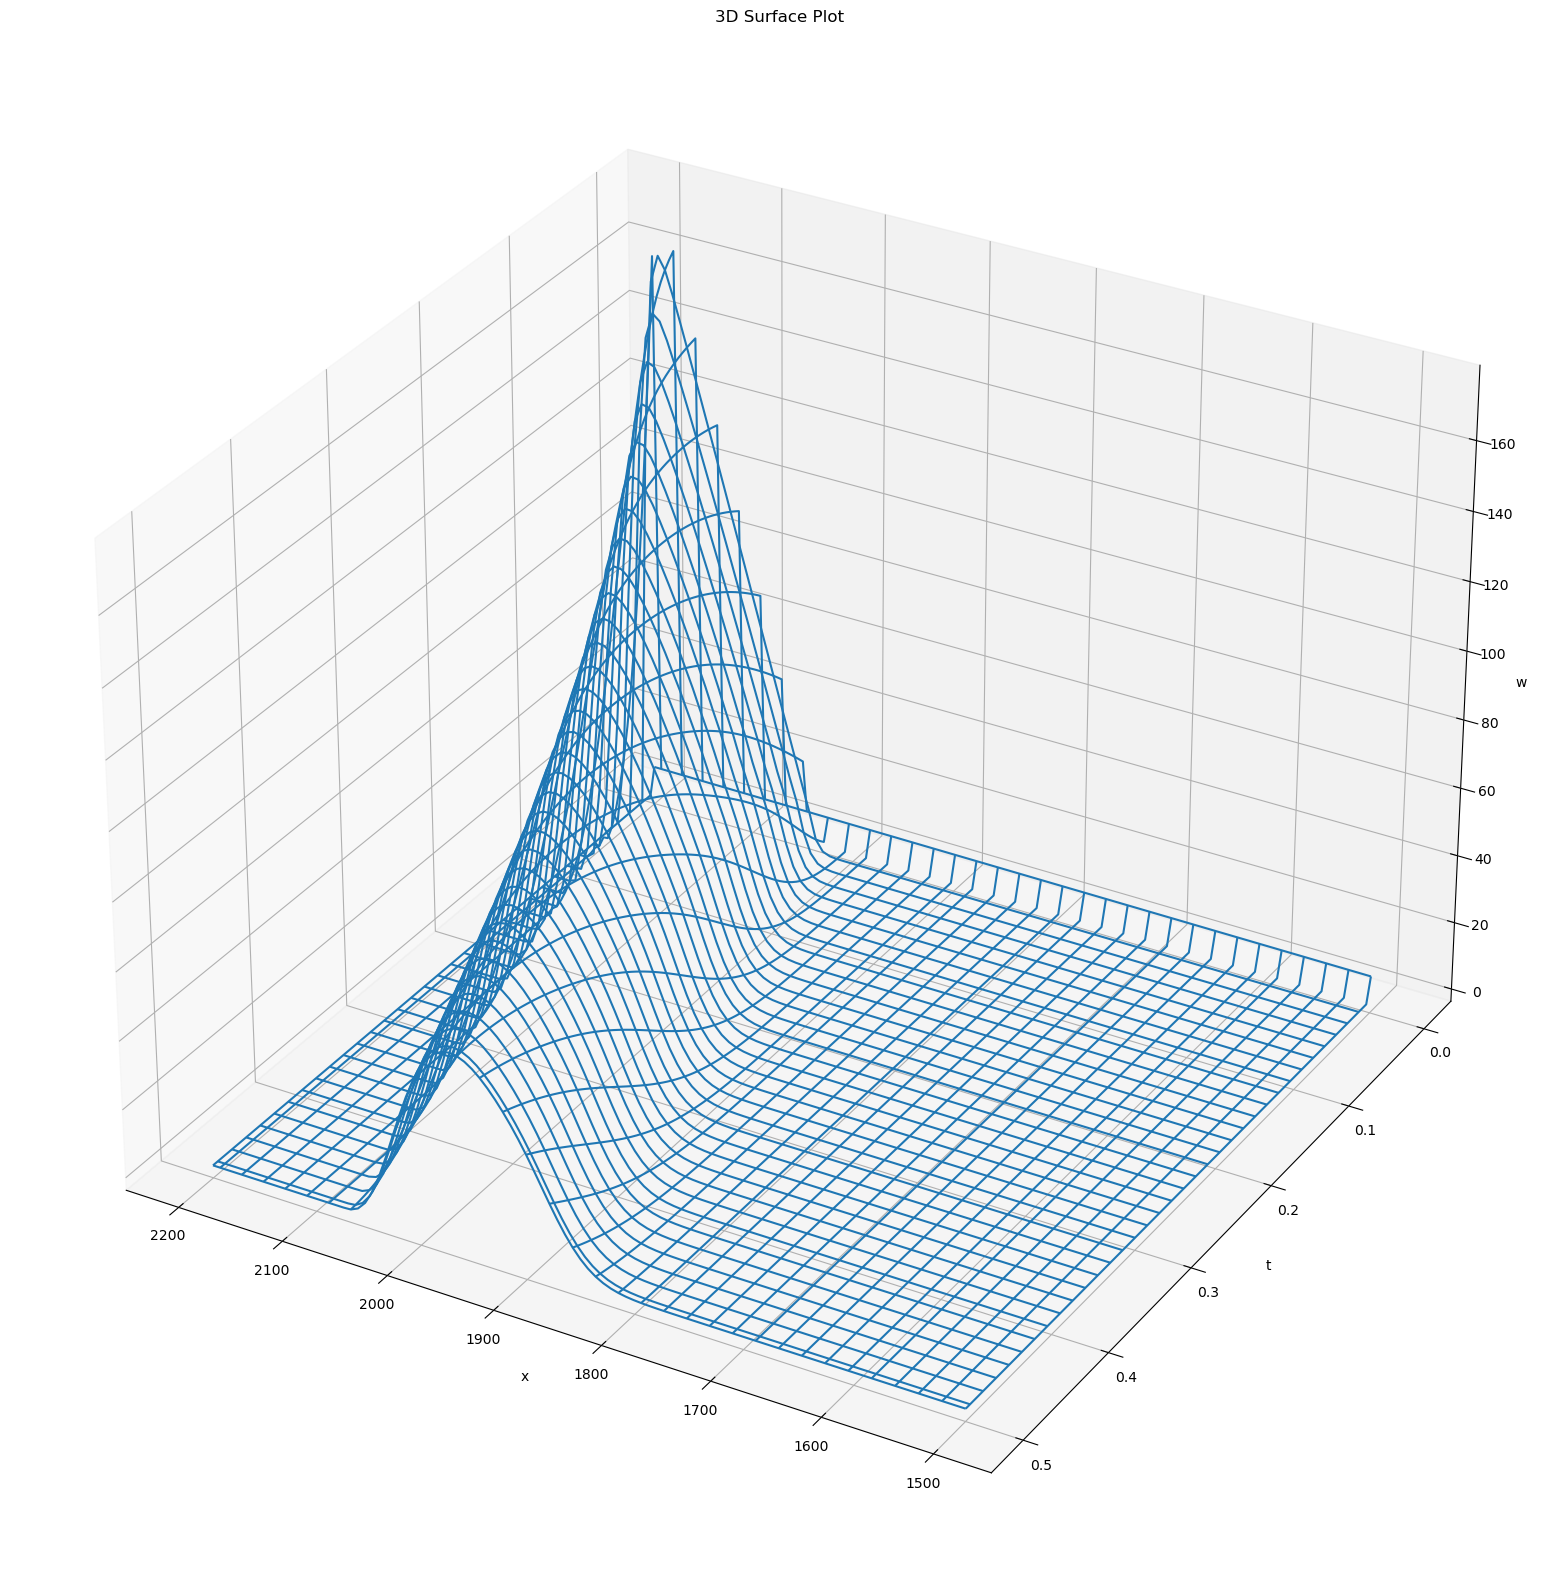

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example values for x and y axes
#x = np.linspace(-5, 5, 100)
#y = np.linspace(-5, 5, 100)
x = np.linspace(xmin, xmax, N+1)
t = np.linspace(0, T, M+1)
X, Y = np.meshgrid(x,t)
print(len(x))
print(len(t))
# Example matrix of values for the vertical axis
Z = np.array(Wmatrix)
print(np.shape(Z))
# Create 3D figure
fig = plt.figure(figsize = (40,20))
ax = fig.add_subplot(111, projection='3d')

# Plot surface with X, Y, and Z values
#ax.plot_surface(X, Y, Z, cmap='viridis')
#ax.scatter(X, Y, Z)#, cmap='viridis')
ax.plot_wireframe(X, Y, Z)
# Add axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('w')
ax.set_title('3D Surface Plot')

# Manually adjust the viewing angle
ax.view_init(30,120)

# Show the plot
plt.show()
